### Data Dictionary

In this notebook, we learn how to use scikit-learn to implement Multiple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *
from pycaret.clustering import *
from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("teleCust1000t.csv")

In [3]:
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
df.describe(include='all')

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [6]:
df.shape

(1000, 12)

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

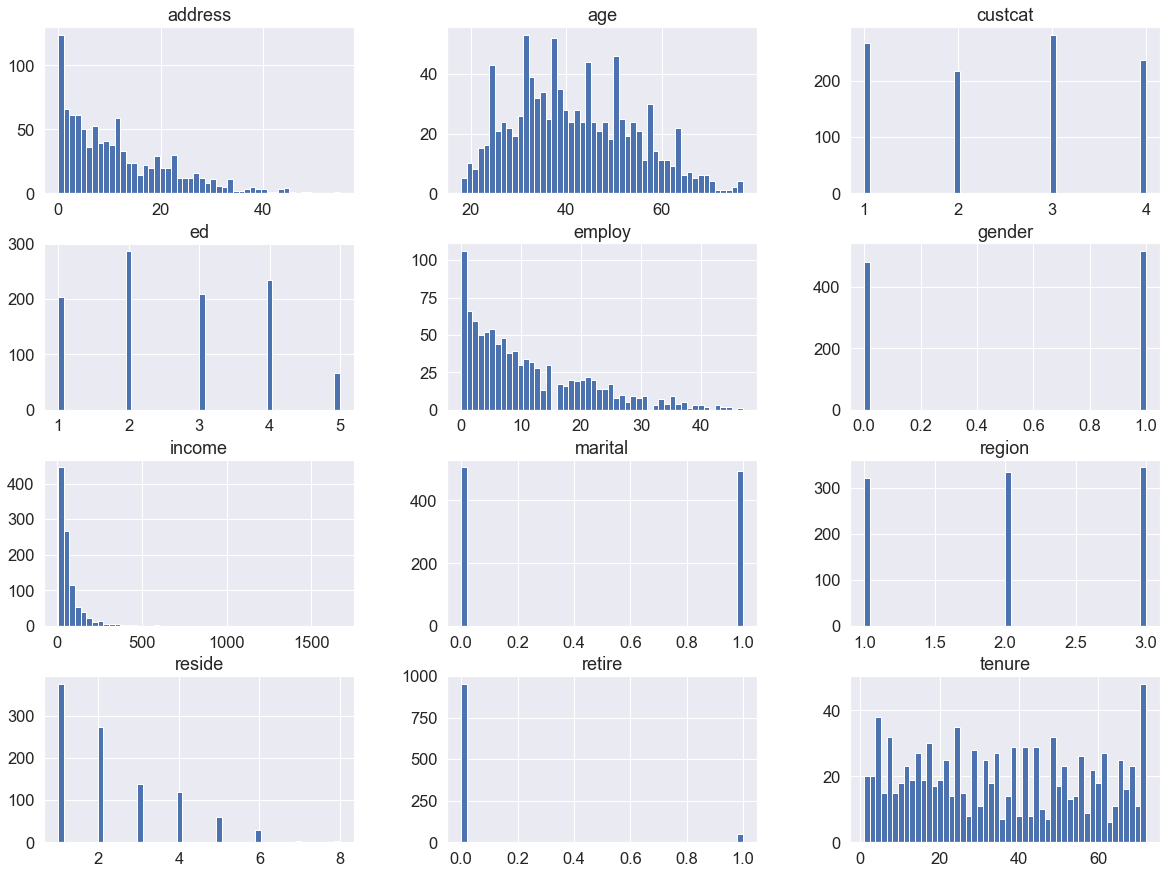

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Using Pycaret

In [9]:
exp_cat = setup(data = df, target = 'custcat', session_id=123, normalize=True) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1000, 12)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.965400,1.178800,1.085200,0.017800,0.338400,0.554300
1,Ridge Regression,0.970200,1.200100,1.094800,-0.001500,0.339300,0.551400
2,Linear Regression,0.970800,1.204100,1.096600,-0.004800,0.339600,0.551500
3,Least Angle Regression,0.970900,1.204700,1.096900,-0.005300,0.339600,0.551600
4,AdaBoost Regressor,0.971100,1.212700,1.100000,-0.008200,0.342600,0.553300
5,Elastic Net,0.983800,1.215600,1.101400,-0.009200,0.346300,0.576000
6,Lasso Least Angle Regression,0.983800,1.215600,1.101400,-0.009200,0.346300,0.576000
7,Lasso Regression,0.983800,1.215600,1.101400,-0.009200,0.346300,0.576000
8,Orthogonal Matching Pursuit,0.977900,1.214100,1.101000,-0.011700,0.341600,0.558400
9,Extreme Gradient Boosting,0.960800,1.217700,1.101800,-0.013700,0.341900,0.543100


In [11]:
bayes = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0275,1.2561,1.1208,0.0791,0.3448,0.5685
1,0.9092,1.0438,1.0216,-0.0334,0.3341,0.5711
2,1.0172,1.2761,1.1296,0.0645,0.3432,0.5531
3,0.9512,1.1369,1.0663,0.0208,0.3247,0.5018
4,0.9599,1.2210,1.1050,-0.0323,0.3475,0.5686
5,0.9311,1.0873,1.0427,0.0797,0.3369,0.5769
6,0.9530,1.1398,1.0676,-0.0043,0.3217,0.4944
7,0.9573,1.1541,1.0743,0.0390,0.3498,0.6048
8,1.0076,1.2760,1.1296,0.0624,0.3562,0.6010
9,0.9404,1.1968,1.0940,-0.0974,0.3246,0.5026


In [12]:
print(bayes)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


In [14]:
tuned_br = tune_model('br', optimize='mse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0243,1.2553,1.1204,0.0798,0.3451,0.5681
1,0.9063,1.0448,1.0222,-0.0345,0.3341,0.5686
2,1.0247,1.2800,1.1314,0.0617,0.3443,0.5574
3,0.9494,1.1272,1.0617,0.0292,0.3236,0.5006
4,0.9705,1.2423,1.1146,-0.0503,0.3502,0.5736
5,0.9245,1.0725,1.0356,0.0922,0.3352,0.5740
6,0.9551,1.1268,1.0615,0.0071,0.3199,0.4948
7,0.9865,1.2190,1.1041,-0.0150,0.3581,0.6267
8,1.0107,1.2689,1.1265,0.0677,0.3554,0.6013
9,0.9285,1.1284,1.0622,-0.0347,0.3213,0.5034


In [15]:
print(tuned_br)

BayesianRidge(alpha_1=0.1, alpha_2=0.1, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.01, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False)


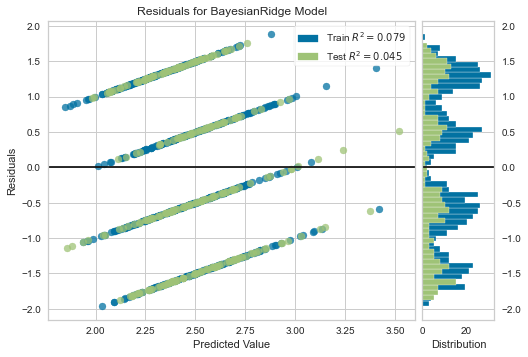

In [16]:
plot_model(tuned_br)

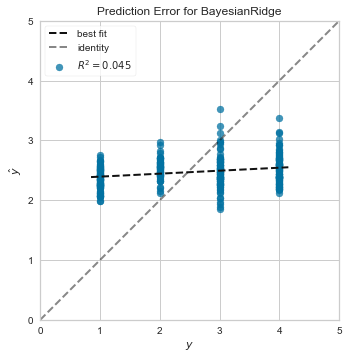

In [17]:
plot_model(tuned_br, plot='error')

In [18]:
interpret_model(tuned_br)

SystemExit: (Type Error): This function only supports tree based models.

In [19]:
evaluate_model(tuned_br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
predict_model(tuned_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.0155,1.2712,1.1275,0.0452,0.3446,0.554


,tenure,age,address,income,employ,region_1,region_2,region_3,marital_1,ed_1,...,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,custcat,Label
0,-1.336167,-0.532482,-1.145747,-0.285399,0.298996,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2.2761
1,1.286891,1.698143,0.738868,1.060513,1.589057,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.7934
2,-0.258840,-0.612147,-0.748986,-0.472331,-0.991064,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2.5007
3,0.396925,0.264170,0.738868,0.097812,0.993644,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.4394
4,-0.586722,-1.329134,-0.550605,-0.369518,-0.991064,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,2.3550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-1.429848,-0.691812,-0.550605,-0.360172,-0.693358,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,2.1827
297,1.567933,1.698143,1.631580,0.845541,3.176824,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.6526
298,-0.446201,-0.054491,0.838058,-0.547104,-1.090300,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2.4609
299,-0.118319,-1.249469,-0.649795,-0.294745,-0.991064,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,2.4387
